# Trend analysis
How has stream flow changed over time?

In [16]:
#Import libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

#This is the new player: scikit learn, or 'sklearn'
from sklearn import datasets, linear_model

In [83]:
#Set defaults
%matplotlib inline
rcParams['figure.figsize'] = 20,10
sb.set_style('whitegrid')
sb.set(font_scale=2)

In [4]:
#Load data
df=pd.read_csv('GageData.csv',dtype={'site_no':'str'},parse_dates=['datetime'])
df['year'] = df['datetime'].map(lambda x: x.year)
df['month'] = df['datetime'].map(lambda x: x.month)
df['water_year'] = df['datetime'].apply(lambda x: x.year if x.month >= 10 else x.year - 1)
df['MeanFlow_cms'] = df['MeanFlow_cfs'] * 0.028316847 
df.index = df.datetime

In [5]:
#Add "status" column to hold pre/construction/post Falls Lake status
df.loc[df['year'] < 1980, 'status'] = 'PreFallsLake'
df.loc[df['year'] >= 1984, 'status'] = 'PostFallsLake'
#Drop other records

### Is there a statistically significant change in average annual flow over time?
Compute average annual stream flow, then run a regression of that against time.

In [105]:
#Compute average annual stream flow, keeping the status column
grpYear = df.groupby('water_year')
dfYearly = grpYear.agg({'MeanFlow_cms':'sum','status':'first'})
dfYearly['year'] = dfYearly.index
dfYearly.head()

,MeanFlow_cms,status,year
water_year,,,
1930,10371.300065,PreFallsLake,1930
1931,7977.110652,PreFallsLake,1931
1932,11091.114316,PreFallsLake,1932
1933,9831.297793,PreFallsLake,1933
1934,13954.513885,PreFallsLake,1934


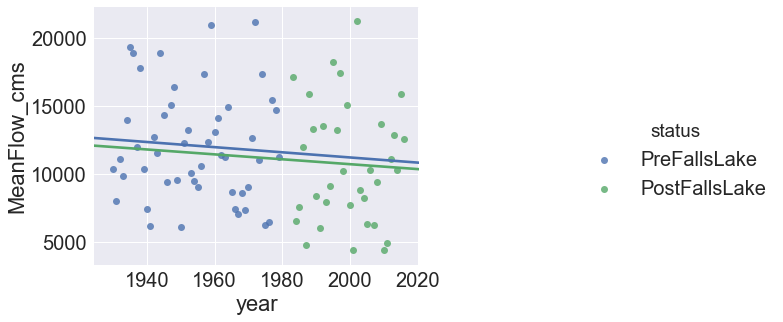

In [116]:
#Plot
g = sb.lmplot('year','MeanFlow_cms',
               data=dfYearly.dropna(axis='rows'),
               hue='status',
               ci=None
              )
g.fig.set_size_inches(14,5);

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [119]:
#Extract the x and y values we want to model
x = dfYearly['year']
y = dfYearly['MeanFlow_cms']

#Add a new dimension to the x and y arrays (req'd by sklearn)
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

#Create the Linear Regression model object
LinReg = linear_model.LinearRegression(normalize=True)

#Fit the data to the model
LinReg.fit(x,y)

#Get the results
r2 = LinReg.score(x,y)
slope = LinReg.coef_[0][0]
intercept = LinReg.intercept_[0]

#Construct the formula and show
formula = 'y = {0:0.2f}x + {1:0.2f} (R2={2:0.3f})'.format(slope,intercept,r2)
print(formula)


y = -27.28x + 65309.19 (R2=0.027)


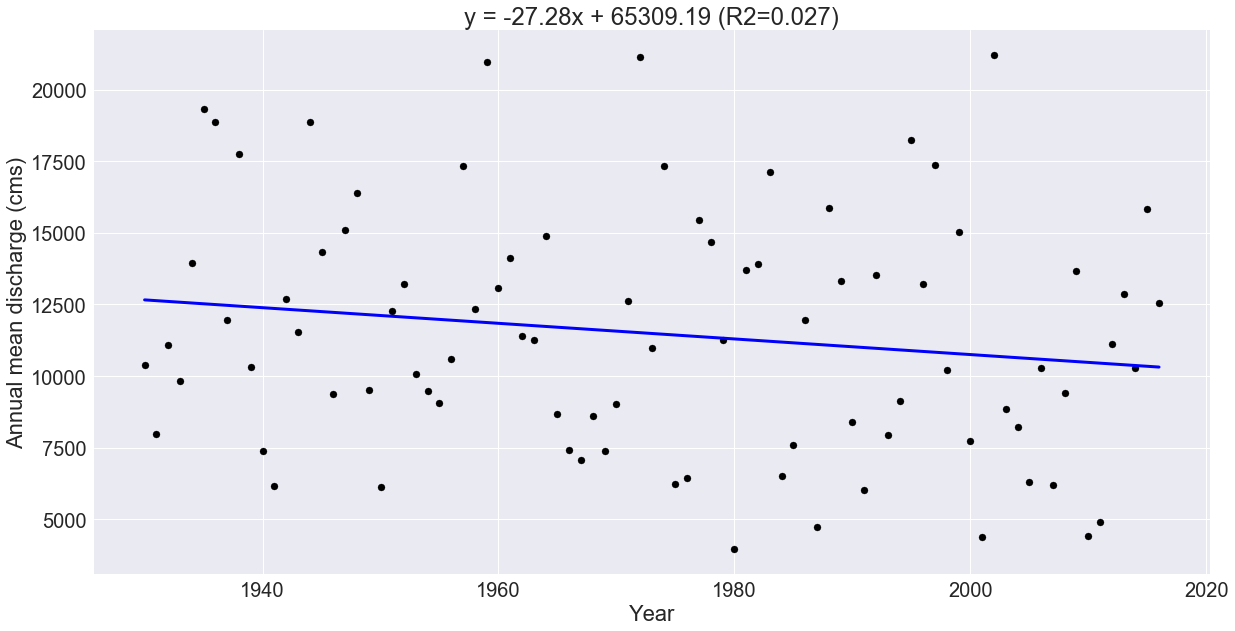

In [120]:
#Create the figure and axes objects
fig,ax = plt.subplots()

#Add a scatter plot of data
ax.scatter(x, y,  color='black')

#Add the regression line
ax.plot(x, LinReg.predict(x), color='blue', linewidth=3)

#Add aesthetics
ax.set_xlabel("Year")
ax.set_ylabel("Annual mean discharge (cms)")
ax.set_title(formula)

#Show the plot
ax;

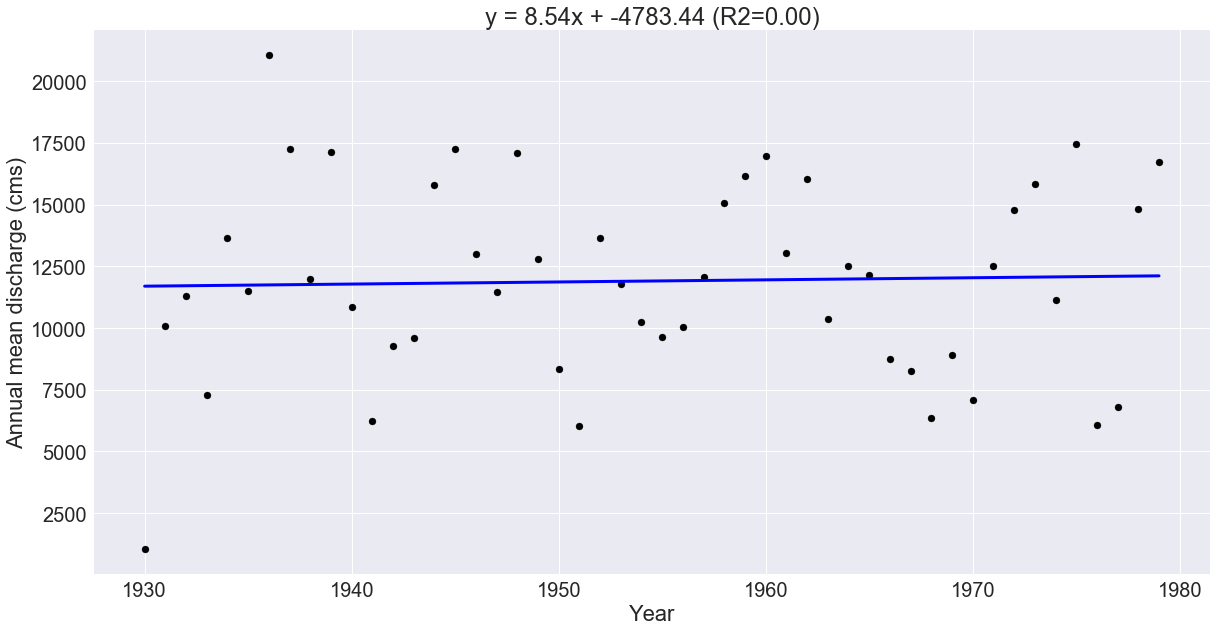

In [103]:
#All steps for data < 1980

#Create a filter
dfFiltered = dfYearly[dfYearly['year'] < 1980]

#Extract the x and y values we want to model
x = dfFiltered['year']
y = dfFiltered['MeanFlow_cms']

#Add a new dimension to the x and y arrays (req'd by sklearn)
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

#Create the Linear Regression model object
LinReg = linear_model.LinearRegression(normalize=True)

#Fit the data to the model
LinReg.fit(x,y)

#Get the results
r2 = LinReg.score(x,y)
slope = LinReg.coef_[0][0]
intercept = LinReg.intercept_[0]

#Construct the formula and show
formula = 'y = {0:0.2f}x + {1:0.2f} (R2={2:0.2f})'.format(slope,intercept,r2)


fig,ax = plt.subplots()

ax.scatter(x, y,  color='black')
ax.plot(x, LinReg.predict(x), color='blue', linewidth=3)
ax.set_xlabel("Year")
ax.set_ylabel("Annual mean discharge (cms)")
ax.set_title(formula)

ax;